In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [5]:
cities

['okha',
 'rikitea',
 'punta arenas',
 'thompson',
 'jamestown',
 'barrow',
 'mataura',
 'nikolskoye',
 'dudinka',
 'busselton',
 'avarua',
 'arraial do cabo',
 'illoqqortoormiut',
 'dikson',
 'venezuela',
 'mayo',
 'saint-philippe',
 'mogadishu',
 'ushuaia',
 'hobart',
 'kasongo-lunda',
 'cape town',
 'martin',
 'vaini',
 'savannah bight',
 'selenginsk',
 'atuona',
 'serebryansk',
 'praia',
 'gamboma',
 'bluff',
 'ceres',
 'san cristobal',
 'olga',
 'dali',
 'port moresby',
 'tsihombe',
 'puerto ayora',
 'port alfred',
 'carroll',
 'deqing',
 'kodiak',
 'togur',
 'ancud',
 'hilo',
 'belushya guba',
 'chokurdakh',
 'sao jose da coroa grande',
 'butaritari',
 'college',
 'vilhena',
 'tautira',
 'talca',
 'inirida',
 'saint-pierre',
 'esperance',
 'asau',
 'east london',
 'tuktoyaktuk',
 'kasamwa',
 'saskylakh',
 'hermanus',
 'kruisfontein',
 'ginir',
 'airai',
 'kapaa',
 'bredasdorp',
 'samarai',
 'cidreira',
 'te anau',
 'barentsburg',
 'poya',
 'buin',
 'wasilla',
 'fagundes',
 'new n

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | okha
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | dudinka
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | dikson
Processing Record 15 of Set 1 | venezuela
Processing Record 16 of Set 1 | mayo
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | mogadishu
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | kasongo-lunda
Processing Record 22 of Set 1 | cape town
Processing Record 23 of Set 1 | martin
Processing Record 24 of

Processing Record 42 of Set 4 | skagen
Processing Record 43 of Set 4 | riberalta
Processing Record 44 of Set 4 | torbay
Processing Record 45 of Set 4 | codrington
Processing Record 46 of Set 4 | nishihara
Processing Record 47 of Set 4 | sarab
Processing Record 48 of Set 4 | kismayo
Processing Record 49 of Set 4 | wanning
Processing Record 50 of Set 4 | carnarvon
Processing Record 1 of Set 5 | svetlogorsk
Processing Record 2 of Set 5 | tabou
Processing Record 3 of Set 5 | vanderhoof
Processing Record 4 of Set 5 | touros
Processing Record 5 of Set 5 | yellowknife
Processing Record 6 of Set 5 | taber
Processing Record 7 of Set 5 | lamu
Processing Record 8 of Set 5 | elizabeth city
Processing Record 9 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 10 of Set 5 | barawe
City not found. Skipping...
Processing Record 11 of Set 5 | mananjary
Processing Record 12 of Set 5 | port lincoln
Processing Record 13 of Set 5 | akyab
Processing Record 14 of Set 5 | malinao
Processin

Processing Record 31 of Set 8 | walvis bay
Processing Record 32 of Set 8 | ambilobe
Processing Record 33 of Set 8 | kundiawa
Processing Record 34 of Set 8 | margate
Processing Record 35 of Set 8 | talcahuano
Processing Record 36 of Set 8 | bonfim
Processing Record 37 of Set 8 | mahebourg
Processing Record 38 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 39 of Set 8 | lachi
Processing Record 40 of Set 8 | nome
Processing Record 41 of Set 8 | roald
Processing Record 42 of Set 8 | fortuna
Processing Record 43 of Set 8 | eureka
Processing Record 44 of Set 8 | bakchar
Processing Record 45 of Set 8 | bosaso
Processing Record 46 of Set 8 | marsa matruh
Processing Record 47 of Set 8 | pingxiang
Processing Record 48 of Set 8 | teguise
Processing Record 49 of Set 8 | sanming
Processing Record 50 of Set 8 | daxian
City not found. Skipping...
Processing Record 1 of Set 9 | port augusta
Processing Record 2 of Set 9 | mayumba
Processing Record 3 of Set 9 | korla
Processing Reco

Processing Record 19 of Set 12 | marshall
Processing Record 20 of Set 12 | colonelganj
Processing Record 21 of Set 12 | totana
Processing Record 22 of Set 12 | atikokan
Processing Record 23 of Set 12 | palmer
Processing Record 24 of Set 12 | champerico
Processing Record 25 of Set 12 | livingston
Processing Record 26 of Set 12 | mao
Processing Record 27 of Set 12 | nguiu
City not found. Skipping...
Processing Record 28 of Set 12 | neuquen
Processing Record 29 of Set 12 | axim
Processing Record 30 of Set 12 | nhulunbuy
Processing Record 31 of Set 12 | troy
Processing Record 32 of Set 12 | kamen-rybolov
Processing Record 33 of Set 12 | itarema
Processing Record 34 of Set 12 | madimba
Processing Record 35 of Set 12 | souillac
Processing Record 36 of Set 12 | kloulklubed
Processing Record 37 of Set 12 | kalianget
Processing Record 38 of Set 12 | bulgan
Processing Record 39 of Set 12 | vestmannaeyjar
Processing Record 40 of Set 12 | peleduy
Processing Record 41 of Set 12 | roura
Processing R

In [11]:
city_data

[{'City': 'Okha',
  'Lat': 53.5739,
  'Lng': 142.9478,
  'Max Temp': 55.62,
  'Humidity': 84,
  'Cloudiness': 100,
  'Wind Speed': 15.28,
  'Country': 'RU',
  'Date': '2021-08-05 01:24:05'},
 {'City': 'Rikitea',
  'Lat': -23.1203,
  'Lng': -134.9692,
  'Max Temp': 72.86,
  'Humidity': 71,
  'Cloudiness': 10,
  'Wind Speed': 17.02,
  'Country': 'PF',
  'Date': '2021-08-05 01:23:10'},
 {'City': 'Punta Arenas',
  'Lat': -53.15,
  'Lng': -70.9167,
  'Max Temp': 44.71,
  'Humidity': 76,
  'Cloudiness': 0,
  'Wind Speed': 9.22,
  'Country': 'CL',
  'Date': '2021-08-05 01:20:16'},
 {'City': 'Thompson',
  'Lat': 55.7435,
  'Lng': -97.8558,
  'Max Temp': 59.16,
  'Humidity': 55,
  'Cloudiness': 75,
  'Wind Speed': 6.91,
  'Country': 'CA',
  'Date': '2021-08-05 01:23:21'},
 {'City': 'Jamestown',
  'Lat': 42.097,
  'Lng': -79.2353,
  'Max Temp': 71.24,
  'Humidity': 61,
  'Cloudiness': 40,
  'Wind Speed': 1.01,
  'Country': 'US',
  'Date': '2021-08-05 01:20:20'},
 {'City': 'Barrow',
  'Lat': 71.2

In [12]:
len(city_data)

584

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Okha,53.5739,142.9478,55.62,84,100,15.28,RU,2021-08-05 01:24:05
1,Rikitea,-23.1203,-134.9692,72.86,71,10,17.02,PF,2021-08-05 01:23:10
2,Punta Arenas,-53.1500,-70.9167,44.71,76,0,9.22,CL,2021-08-05 01:20:16
3,Thompson,55.7435,-97.8558,59.16,55,75,6.91,CA,2021-08-05 01:23:21
4,Jamestown,42.0970,-79.2353,71.24,61,40,1.01,US,2021-08-05 01:20:20
5,Barrow,71.2906,-156.7887,55.42,67,1,13.80,US,2021-08-05 01:23:40
6,Mataura,-46.1927,168.8643,48.47,72,100,5.57,NZ,2021-08-05 01:23:20
7,Nikolskoye,59.7035,30.7861,53.80,76,41,3.09,RU,2021-08-05 01:23:16
8,Dudinka,69.4058,86.1778,70.88,57,63,3.76,RU,2021-08-05 01:24:23
9,Busselton,-33.6500,115.3333,54.05,77,0,6.78,AU,2021-08-05 01:23:17


In [14]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [15]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Okha,RU,2021-08-05 01:24:05,53.5739,142.9478,55.62,84,100,15.28
1,Rikitea,PF,2021-08-05 01:23:10,-23.1203,-134.9692,72.86,71,10,17.02
2,Punta Arenas,CL,2021-08-05 01:20:16,-53.1500,-70.9167,44.71,76,0,9.22
3,Thompson,CA,2021-08-05 01:23:21,55.7435,-97.8558,59.16,55,75,6.91
4,Jamestown,US,2021-08-05 01:20:20,42.0970,-79.2353,71.24,61,40,1.01
...,...,...,...,...,...,...,...,...,...
579,Kyzyl-Suu,KG,2021-08-05 01:26:50,42.3414,78.0056,62.31,53,2,4.16
580,Hare Bay,CA,2021-08-05 01:26:50,48.8499,-54.0148,65.55,72,100,2.28
581,Anderson,US,2021-08-05 01:26:50,34.5334,-82.6499,74.79,82,75,1.99
582,Tukrah,LY,2021-08-05 01:26:51,32.5341,20.5791,82.26,67,0,9.13


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

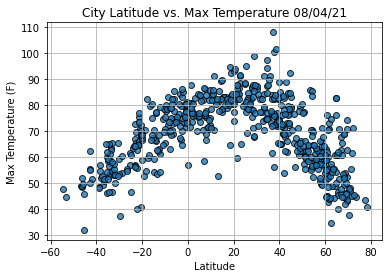

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Lat_vs_Temp.png")

# Show plot.
plt.show()

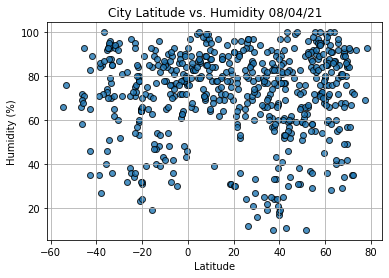

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Lat_vs_Humidity.png")
# Show plot.
plt.show()

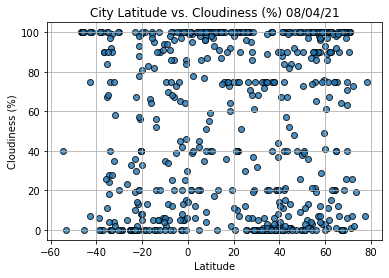

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Lat_vs_Cloudiness.png")
# Show plot.
plt.show()

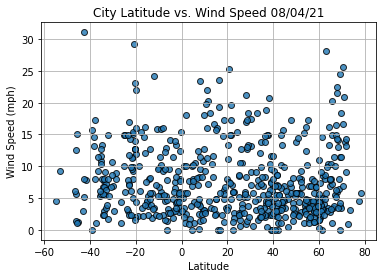

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Lat_vs_Wind.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                    Venezuela
Country                        VE
Date          2021-08-05 01:24:23
Lat                           8.0
Lng                         -66.0
Max Temp                    75.33
Humidity                       85
Cloudiness                     51
Wind Speed                   9.51
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4       True
       ...  
579     True
580     True
581     True
582     True
583    False
Name: Lat, Length: 584, dtype: bool

In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

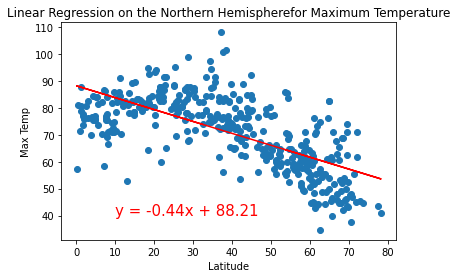

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere'\
                       'for Maximum Temperature', 'Max Temp',(10,40))

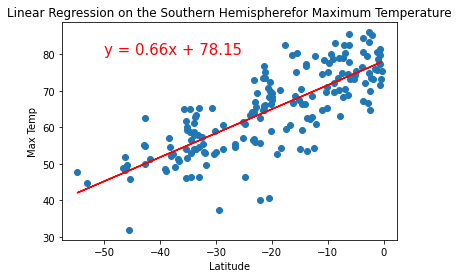

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere'\
                       'for Maximum Temperature', 'Max Temp',(-50,80))

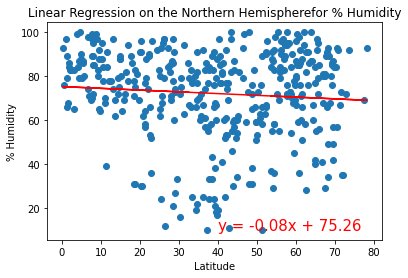

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere'\
                       'for % Humidity', '% Humidity',(40,10))

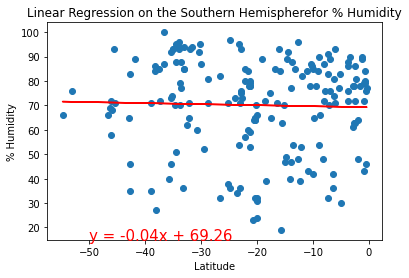

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere'\
                       'for % Humidity', '% Humidity',(-50,15))

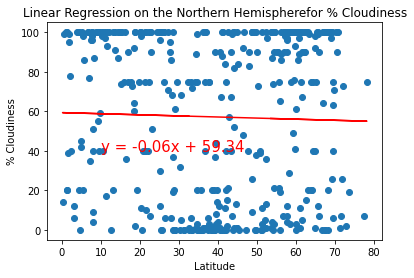

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere'\
                       'for % Cloudiness', '% Cloudiness',(10,40))

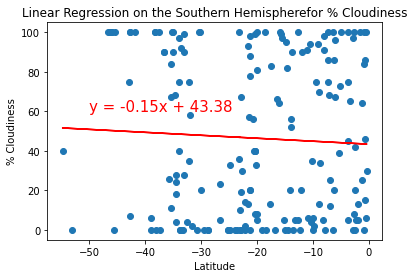

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere'\
                       'for % Cloudiness', '% Cloudiness',(-50,60))

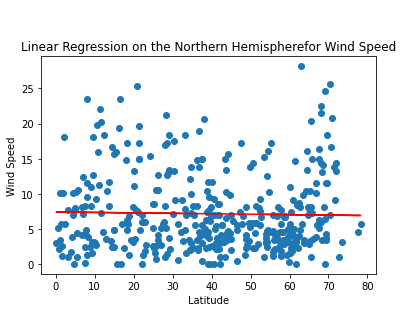

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere'\
                       'for Wind Speed', 'Wind Speed',(40,35))

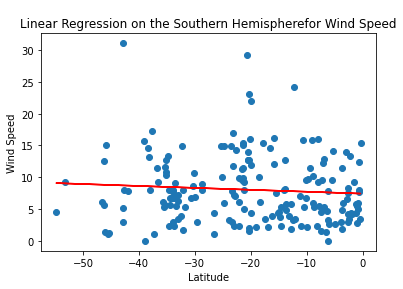

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere'\
                       'for Wind Speed', 'Wind Speed',(-50,35))

In [34]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

In [35]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Okha,RU,2021-08-05 01:24:05,53.5739,142.9478,55.62,84,100,15.28
1,1,Rikitea,PF,2021-08-05 01:23:10,-23.1203,-134.9692,72.86,71,10,17.02
2,2,Punta Arenas,CL,2021-08-05 01:20:16,-53.1500,-70.9167,44.71,76,0,9.22
3,3,Thompson,CA,2021-08-05 01:23:21,55.7435,-97.8558,59.16,55,75,6.91
4,4,Jamestown,US,2021-08-05 01:20:20,42.0970,-79.2353,71.24,61,40,1.01


In [36]:
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [37]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [38]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [40]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=temps, dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [41]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [42]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [43]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [44]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [45]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
10,10,Avarua,CK,2021-08-05 01:23:08,-21.2078,-159.7750,75.25,78,20,9.22
13,13,Venezuela,VE,2021-08-05 01:24:23,8.0000,-66.0000,75.33,85,51,9.51
14,14,Mayo,US,2021-08-05 01:24:24,38.8876,-76.5119,75.38,76,1,4.00
16,16,Mogadishu,SO,2021-08-05 01:24:24,2.0371,45.3438,75.96,83,78,18.10
21,21,Martin,US,2021-08-05 01:24:25,27.0837,-80.4164,80.55,93,100,5.14
23,23,Savannah Bight,HN,2021-08-05 01:24:26,16.4500,-85.8500,82.99,82,36,23.51
25,25,Atuona,PF,2021-08-05 01:23:36,-9.8000,-139.0333,77.76,65,2,9.75
27,27,Praia,CV,2021-08-05 01:24:27,14.9215,-23.5087,78.48,88,100,4.79
31,31,San Cristobal,VE,2021-08-05 01:24:28,7.7669,-72.2250,75.38,97,98,4.07
32,32,Olga,RU,2021-08-05 01:24:28,43.7444,135.2892,84.81,59,100,3.53


In [46]:
preferred_cities_df.count()

City_ID       201
City          201
Country       201
Date          201
Lat           201
Lng           201
Max Temp      201
Humidity      201
Cloudiness    201
Wind Speed    201
dtype: int64

In [47]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
10,Avarua,CK,75.25,-21.2078,-159.7750,
13,Venezuela,VE,75.33,8.0000,-66.0000,
14,Mayo,US,75.38,38.8876,-76.5119,
16,Mogadishu,SO,75.96,2.0371,45.3438,
21,Martin,US,80.55,27.0837,-80.4164,
23,Savannah Bight,HN,82.99,16.4500,-85.8500,
25,Atuona,PF,77.76,-9.8000,-139.0333,
27,Praia,CV,78.48,14.9215,-23.5087,
31,San Cristobal,VE,75.38,7.7669,-72.2250,
32,Olga,RU,84.81,43.7444,135.2892,


In [48]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

In [52]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping.")

Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.


In [53]:
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
10,Avarua,CK,75.25,-21.2078,-159.7750,Paradise Inn
13,Venezuela,VE,75.33,8.0000,-66.0000,
14,Mayo,US,75.38,38.8876,-76.5119,Resorts Resource Group International
16,Mogadishu,SO,75.96,2.0371,45.3438,Hotel Juba
21,Martin,US,80.55,27.0837,-80.4164,
23,Savannah Bight,HN,82.99,16.4500,-85.8500,Villa on Dunbar Rock
25,Atuona,PF,77.76,-9.8000,-139.0333,Villa Enata
27,Praia,CV,78.48,14.9215,-23.5087,LT Aparthotel
31,San Cristobal,VE,75.38,7.7669,-72.2250,Posada Villaven C.A.
32,Olga,RU,84.81,43.7444,135.2892,Gostinitsa Rosmorport.


In [55]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [56]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

In [57]:
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [58]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))